## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from datetime import datetime
from datetime import timedelta

## Preprocessing

In [26]:
data=pd.read_csv('dataset_esteso.csv')

In [27]:
data.columns

Index(['Unnamed: 0', 'titolo', 'durata', 'views', 'n_comments', 'n_like',
       'genere', 'subscribers', 'publ', 'max_quality', 'timedelta', 'score'],
      dtype='object')

In [14]:
data.columns=['titolo', 'durata', 'views', 'n_comments', 'n_like', 'genere',
       'subscribers', 'FF', 'paid', 'publ', 'max_quality']

In [15]:
#cast dtypes for columns and replace everything with np.nan when value is missing
data['views']=data['views'].replace(" NA", np.nan).astype('Int64')
data['durata']=data['durata'].replace(" NA", np.nan).astype('Int64')
data['FF']=data['FF'].replace(" NA", np.nan).astype('bool')
data['paid']=data['paid'].replace(" NA", np.nan).astype('bool')
data['publ']=data['publ'].replace(" NA", np.nan).astype('str')
data['max_quality']=data['max_quality'].replace(" None", np.nan).astype('Int64')
data['genere']=data['genere'].replace(" NA", np.nan)

TypeError: cannot safely cast non-equivalent float64 to int64

In [16]:
data.dtypes

titolo          object
durata           Int64
views            Int64
n_comments       int64
n_like           int64
genere          object
subscribers      int64
FF                bool
paid              bool
publ            object
max_quality    float64
dtype: object

In [75]:
# tutti i paid e gli ff sono true-> no info -> butto tutto
print(data['paid'].sum()==data['paid'].sum()==len(data))
data=data.drop(['FF','paid'], axis=1)

True


In [76]:
#find rows with all missing values
selected_rows = data[data[['titolo', 'durata', 'views', 'genere', 'max_quality']].isna().all(axis=1)]
data=data.drop(selected_rows.index)

In [77]:
#no double rows
data.duplicated().sum()

0

In [95]:
#non ci sono 1, mettere 1 al posto di nan non cambia lo score
data['max_quality'] = data['max_quality'].fillna(0)
#handling na in score given by missing #views
data['views'][data['views'].isna()]=0
data['likes'][data['likes'].isna()]=0
#convert to datetime
data['publ'] = pd.to_datetime(data['publ'], format=' %Y-%m-%d')
#add timedelta
data['timedelta']=  (data['publ']- data['publ'].min())/(datetime(2022,7,13) - data['publ'].min()) #data della presa dati

In [103]:
data['score'] = data['timedelta'] * (np.log(data['n_like']) + np.log(data['views']))

In [106]:
#normalize score - gesu cristo trova i nan anche se non ci sono
m=data['score'].min(skipna=True)
M=data.score.max()
data['score'] = (data['score']-m)/(M-m)

<AxesSubplot:>

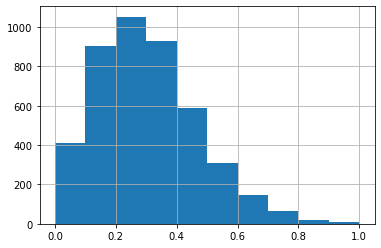

In [110]:
data['score'].hist()

In [29]:
bins=[0,.2,.4,.6]
data['class']=np.digitize(data['score'],bins)

In [30]:
data['class'].value_counts()

2    4366
1    2868
3    1462
4     246
Name: class, dtype: int64

In [31]:
data.to_csv('dataset_esteso.csv')  

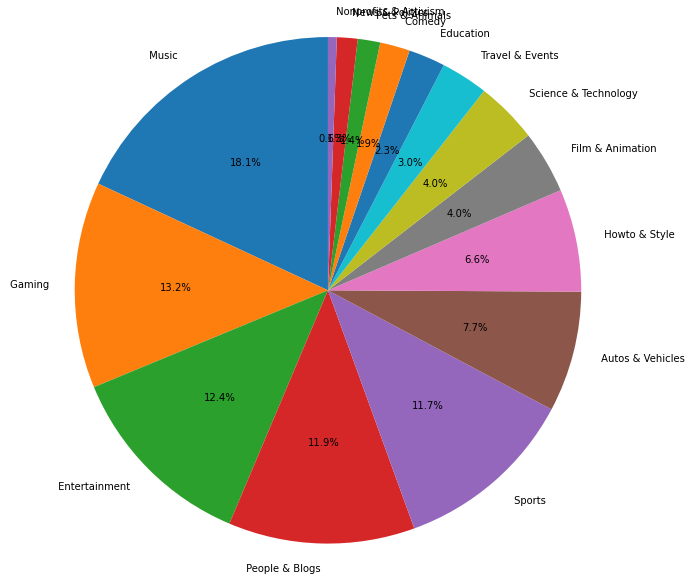

In [32]:
# Pie chart for genres
labels = data['genere'].value_counts().index
sizes = data['genere'].value_counts()/len(data)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal') 

plt.show()

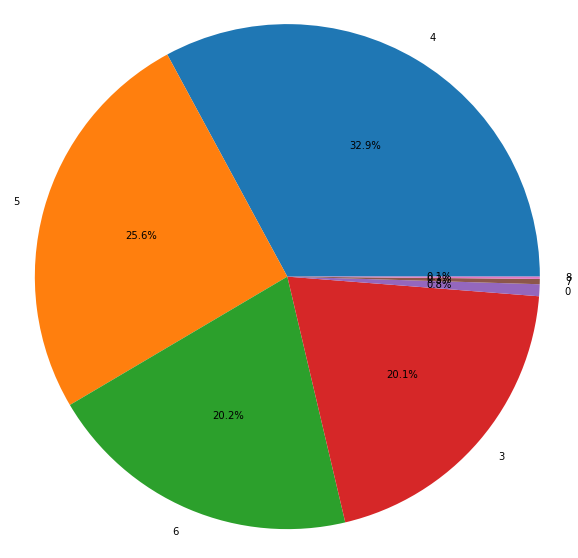

In [33]:
# Pie chart for max_quality
labels = data['max_quality'].value_counts().index
sizes = data['max_quality'].value_counts()/len(data)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 

plt.show()

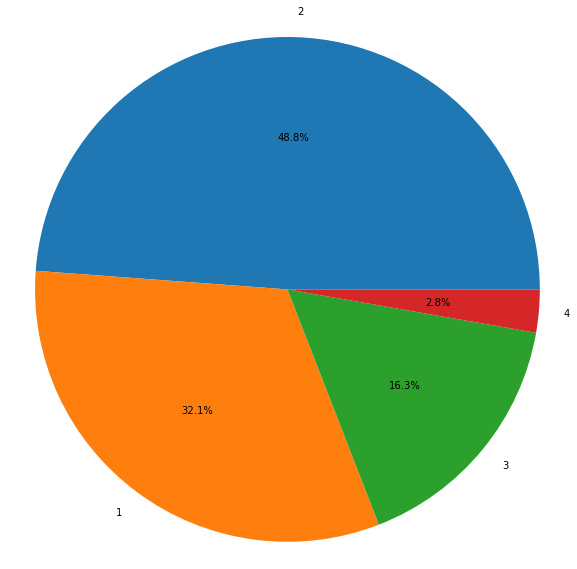

In [34]:
# Pie chart for max_quality
labels = data['class'].value_counts().index
sizes =  data['class'].value_counts()/len(data)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 

plt.show()